In [ ]:
## Jupyter notebook in python
## Calculates the persistence of the event and its best analogues from 2 timeslices

## Caveat: 

In [1]:
import analogue_functions_C3S as my

import xarray as xr
import os
import subprocess
import numpy as np
import iris
import calendar
import matplotlib.pyplot as plt
import matplotlib
cmaps = matplotlib.colormaps
import sys
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cf
import netCDF4 as nc
import glob

from scipy.stats.stats import pearsonr
import scipy.stats as stats

/tmp/ipykernel_3830045/2326992444.py:19: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [2]:
# Defining the variables:
date = [2025, 'May', 17]; # Date to assess
R1 = [80, 40, 30, -30] # Analogues domain
ana_var = 'z500' # Circulation variable, 'msl' or 'z500'


In [ ]:
### Automated variables - can be adjusted for sensitivity testing

# months to include, automatically three calendar month window around the event
month = date[1]
X = list(calendar.month_abbr)
i=X.index(month)
if 1<i<12:
    months = [X[i-1], X[i], X[i+1]]
elif i == 1:
    months = [X[12], X[i], X[i+1]]
elif i ==12:
    months = [X[i-1], X[i], X[1]]

# Or use this line to manually select different month set (can be full year)
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
months = ['Mar','Apr','May']

# start and end of timeslices. Both timeslices should be same length for fair comparison
Y1 = 1950 # timeslice 1 start year
Y2 = 1980 # timeslice 1 end year
Y3 = 1994 # timeslice 2 start year
Y4 = 2024 # timeslice 2 end year

# number of analogues to use - set at 1% (assuming 30 day months) of timeslice 1 days 
N = int(((Y2-Y1)*len(months)*30)/100)
# Or use this line to manually select N
# N = 30

In [4]:
# Check if using ERA5 or extended forecast (for when ERA5 not yet available)
event_data = 'era5'
# Initially using ERA5 daily data, if that gives no data switch to extended:
if my.reanalysis_data_single_date('t2m', date)==None:
    my.ERA5FILESUFFIX = "_daily_extended"
    event_data = "extended"
    print('ERA5 data not yet available, using ECMWF extended forecast for event data')

# If extended also not available give error message:
if my.reanalysis_data_single_date('t2m', date)==None:
    print('Data is not available for that date, please select a date between 1 Jan 1950 and the present day')
    quit() ## If the date has not data (ERA5 or extended) then stop here, and print message above

# Check what it is using:
my.ERA5FILESUFFIX

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily.nc for date [2025, 'May', 17]
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_t2m_daily.nc for date [2025, 'May', 17]


'_daily'

In [5]:
PAST = my.anomaly_period_outputs(Y1, Y2, ana_var, N, date, months, R1)
PRST = my.anomaly_period_outputs(Y3, Y4, ana_var, N, date, months, R1)

/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'May', 17]


/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/pe

In [6]:
def correlation_coeffs(field, event):
    '''
    Returns list of C, calc using linear pearsonr, area averaging applied
    Inputs required:
    field = single cube of analogues field.
    event = cube of single day of event to match.
    BOTH MUST HAVE SAME DIMENSIONS FOR LAT/LON
    '''
    C = [] # to be list of all correlation coefficients
    if not event.coord('latitude').has_bounds():
        event.coord('latitude').guess_bounds()
    if not event.coord('longitude').has_bounds():
        event.coord('longitude').guess_bounds()
    event = set_coord_system(event)
    weights=iris.analysis.cartography.area_weights(event)
    event=event*weights
    a, b, c =np.shape(field) 
    field=field*np.array([weights]*a) 
    XA= event.data.reshape(b*c,1)
    XB = field.data.reshape(np.shape(field.data)[0],b*c,1)
    for i in range(a):
        day = field[i,:,:]
        XA = event.data.reshape(b*c)
        XB = day.data.reshape(b*c)
        C.append(pearsonr(XA, XB)[0])
    return C

def set_coord_system(cube, chosen_system = iris.analysis.cartography.DEFAULT_SPHERICAL_EARTH_RADIUS):
    '''
    This is used to prevent warnings that no coordinate system defined
    Defaults to DEFAULT_SPHERICAL_EARTH_RADIUS
    '''
    cube.coord('latitude').coord_system = iris.coord_systems.GeogCS(chosen_system)
    cube.coord('longitude').coord_system = iris.coord_systems.GeogCS(chosen_system)
    return cube

In [9]:
E = my.extract_region(my.reanalysis_data_single_date(ana_var, date), R1)
P1_msl = my.extract_region(my.reanalysis_data(ana_var, date[0], date[0]+1, months), R1)
C = correlation_coeffs(P1_msl, E)



Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2025, 'May', 17]


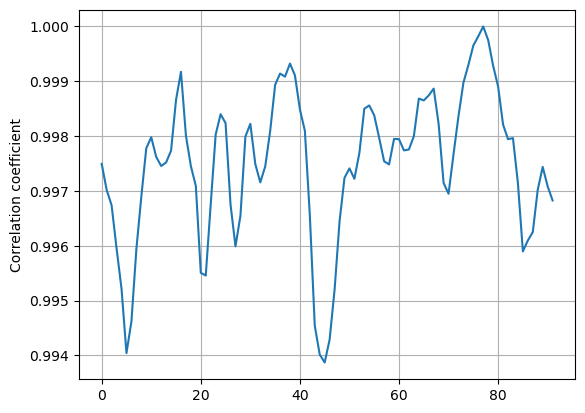

In [13]:
plt.plot(C) # to choose the right level for coeff
plt.ylabel('Correlation coefficient')
plt.grid()

In the next cell the coefficient threshold must be input, decided from the above plot - isolate the event (which will exhibit coeff = 1) whilst including the whole peak, not only the tip

In [14]:
# Determined from above plot
coeff = 0.999

In [15]:

W = C.index(np.max(C))
n = 0
for i in np.arange(W-10, W+10):
    if C[i] > coeff: n+= 1

print(n)
P_event = n

6


In [16]:
my.ERA5FILESUFFIX = "_daily"
P_past =[]
for date in PAST:
    year = int(date[:4])
    month = calendar.month_abbr[int(date[4:-2])]
    day = int(date[-2:])
    E = my.extract_region(my.reanalysis_data_single_date(ana_var, [year, month, day]), R1)
    P1_msl = my.extract_region(my.reanalysis_data(ana_var, year, year+1, ['Mar', 'Apr', 'May', 'Jun','Jul']), R1)
    C = correlation_coeffs(P1_msl, E)
    W = C.index(np.max(C))
    n = 0
    for i in np.arange(W-10, W+10):
        if C[i] > coeff: n+= 1
    print(n, len(P_past))
    P_past.append(n)

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1962, 'Apr', 30]
6 0
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1953, 'May', 9]
8 1
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1964, 'Mar', 3]
4 2
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1976, 'Apr', 22]
4 3
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1958, 'Mar', 18]
7 4
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1961, 'May', 16]
8 5
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1974, 'Apr', 24]
12 6
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1974, 'Apr', 16]
7 7
R

In [17]:
P_prst =[]
for date in PRST:
    year = int(date[:4])
    month = calendar.month_abbr[int(date[4:-2])]
    day = int(date[-2:])
    E = my.extract_region(my.reanalysis_data_single_date(ana_var, [year, month, day]), R1)
    P1_msl = my.extract_region(my.reanalysis_data(ana_var, year, year+1, ['Mar', 'Apr', 'May', 'Jun','Jul']), R1)
    C = correlation_coeffs(P1_msl, E)
    W = C.index(np.max(C))
    n = 0
    for i in np.arange(W-10, W+10):
        if C[i] > coeff: n+= 1
    print(n, len(P_prst))
    P_prst.append(n)

Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1997, 'May', 31]
6 0
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2005, 'Apr', 21]
3 1
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2003, 'Apr', 18]
3 2
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1996, 'Mar', 30]
6 3
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2015, 'Apr', 18]
4 4
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2007, 'May', 1]
6 5
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [1995, 'Apr', 26]
3 6
Read file: /net/pc230042/nobackup/users/sager/nobackup_2_old/ERA5-CX-READY/era5_z500_daily.nc for date [2019, 'Apr', 10]
6 7
R

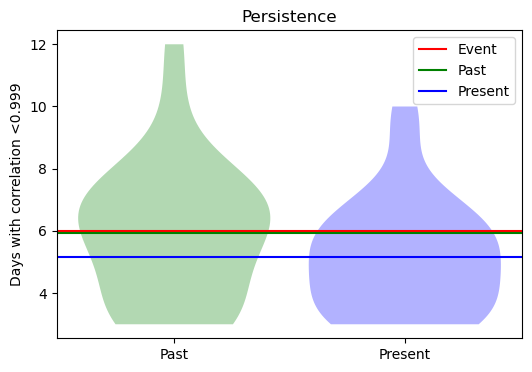

In [22]:
# Violin plots of persistence
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
colors=['g','b']
v2 = ax.violinplot([P_past, P_prst], [1, 1.6], showmeans=False, showextrema=False, showmedians=False)
for pc, color in zip(v2['bodies'], colors):
    pc.set_facecolor(color)
ax.axhline(P_event, color='r', label='Event')
ax.axhline(np.mean(P_past), color='g', label='Past')
ax.axhline(np.mean(P_prst), color='b', label='Present')
ax.set_xticks([1, 1.6])
ax.set_xticklabels(['Past', 'Present'])
ax.set_ylabel('Days with correlation <'+str(coeff))
ax.set_title('Persistence')
plt.legend()


In [24]:
# Summary print out
print('Summary: identify analogues domain')
print('Event definition:')
print('     Date: ', date)
print('Analogue calulation:')
print('     Months assessed: ', months)
print('     Number of analogues: ', N)
print('     Analogue domain: ', R1)
print('     Circulation variable: ', ana_var)
print('Timeslices:')
print('      Past: ',Y1,'-',Y2)
print('      Present: ',Y3,'-',Y4)


u, p = stats.ttest_ind(P_past, P_prst, equal_var=False, alternative='two-sided')
if np.mean(P_past) > np.mean(P_prst):
    print('Greater persistence in Past')
else:
    print('Greater persistence in Present')

if p < 0.05:
    print('  Statistically significant difference')
else:
    print('  Difference is not statistically significant')

if P_event > np.max([np.mean(P_past), np.mean(P_prst)]):
    print('Event greater persistence than analogues mean')
    if P_event > np.max([np.max(P_past), np.max(P_prst)]):
        print('     and outside range of analogues')
    else:
        print('     within range of analogues')
elif P_event < np.min([np.mean(P_past), np.mean(P_prst)]):
    print('Event smaller persistence than analogues mean')
    if P_event > np.max([np.max(P_past), np.max(P_prst)]):
        print('     and outside range of analogues')
    else:
        print('     within range of analogues')


Summary: identify analogues domain
Event definition:
     Date:  20190522
Analogue calulation:
     Months assessed:  ['Mar', 'Apr', 'May']
     Number of analogues:  27
     Analogue domain:  [80, 40, 30, -30]
     Circulation variable:  z500
Timeslices:
      Past:  1950 - 1980
      Present:  1994 - 2024
Greater persistence in Past
  Difference is not statistically significant
Event greater persistence than analogues mean
     within range of analogues
